# Energy consumption of single household with yearly seasonality

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
full_data = pd.read_csv("../../data/synthetic/time_series_single_household.csv")
print(len(full_data))

1442


In [4]:
full_data.head(10)

,Index,Time,Energy
0,0,16/12/2006,2.487728
1,1,17/12/2006,1.619929
2,2,18/12/2006,1.313087
3,3,19/12/2006,1.207975
4,4,20/12/2006,1.581628
5,5,21/12/2006,1.169972
6,6,22/12/2006,2.996203
7,7,23/12/2006,2.798056
8,8,24/12/2006,1.318883
9,9,25/12/2006,2.811164


In [5]:
data = full_data.drop(columns=['Index']).copy()

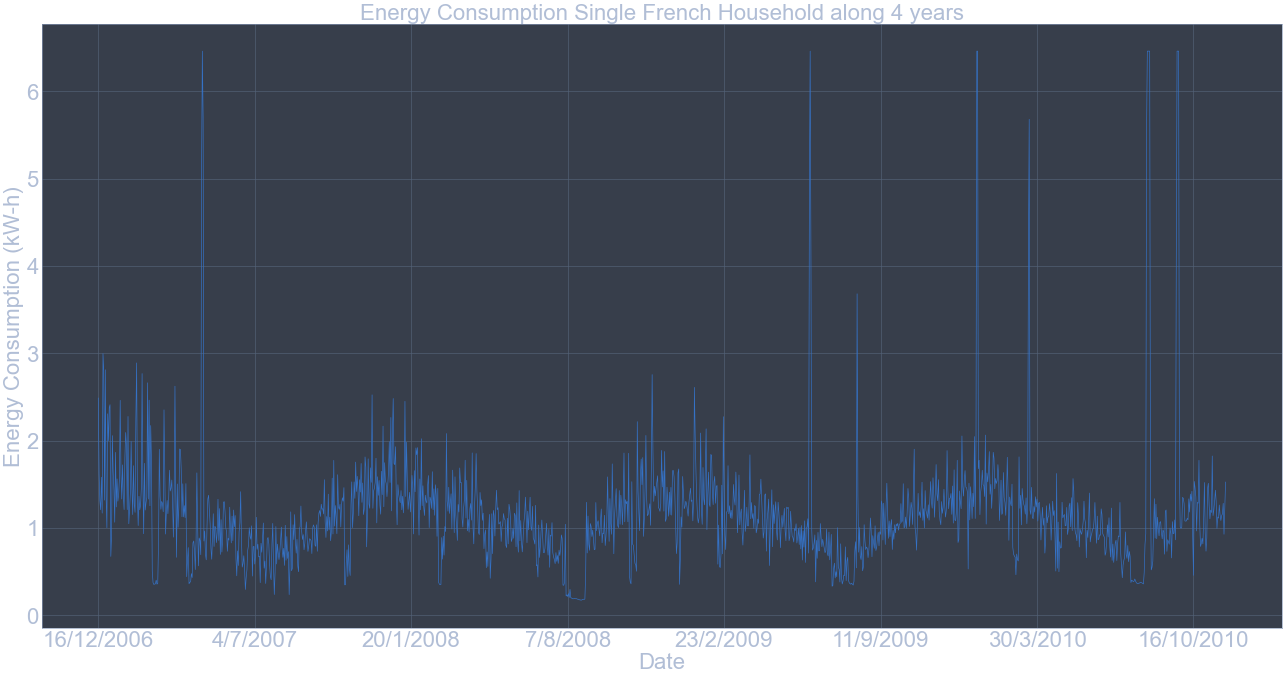

In [6]:
plt.figure(figsize=(40,20), dpi=40)
plt.locator_params(axis='x', nbins=3)
x_ticks = np.arange(0, len(data["Time"]), 200)
plt.xticks(x_ticks)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.plot(data["Time"], data["Energy"])
plt.xlabel("Date", fontsize=40)
plt.ylabel("Energy Consumption (kW-h)", fontsize=40)
plt.title("Energy Consumption Single French Household along 4 years", fontsize=40)
plt.show()

In [7]:
# We observed from the above plot that the trend, seasonality and periodicity can be identified. The irregularity are mostly given by the outliers.

# Rolling Statistics


In [8]:
rollmean = data["Energy"].rolling(window=365).mean()
rollstd = data["Energy"].rolling(window=365).std()
#print(rollmean, rollstd)

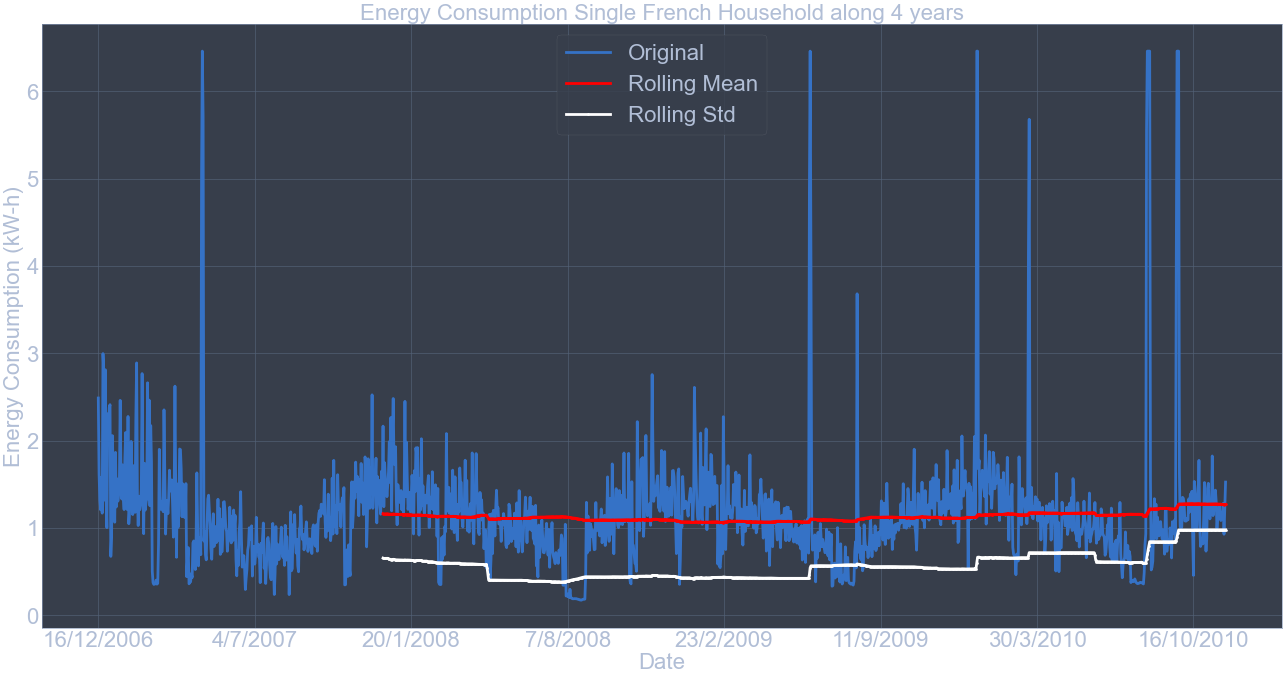

In [9]:
plt.figure(figsize=(40,20), dpi=40)
plt.locator_params(axis='x', nbins=3)
x_ticks = np.arange(0, len(full_data["Time"]), 200)
plt.xticks(x_ticks)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.plot(data["Time"], data["Energy"], label='Original', linewidth='5')
mean = plt.plot(data["Time"], rollmean, '-p', color='red', label='Rolling Mean', linewidth='5')
std = plt.plot(data["Time"], rollstd, '-p', color='white', label='Rolling Std', linewidth='5')
plt.xlabel("Date", fontsize=40)
plt.ylabel("Energy Consumption (kW-h)", fontsize=40)
plt.title("Energy Consumption Single French Household along 4 years", fontsize=40)
plt.legend(loc='best', fontsize=40)
plt.show()


In [10]:
# Also we notice that the data show a stationary behaviour (there is not overall increase or decrease)
# The mean and standard deviation show that there is no significant trend across the yearly seasons

## Outliers treatment

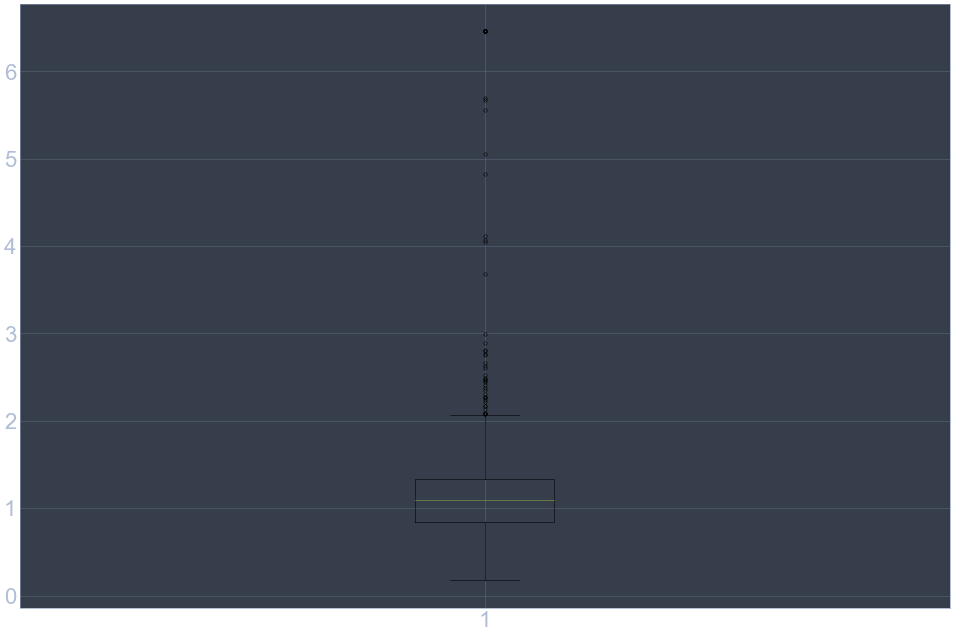

In [11]:
# Find better colors to visualize the boxplot
plt.figure(figsize=(30,20), dpi=40)
plt.boxplot(data['Energy'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()

In [12]:
# we have potentially 8 outliers, but clearly at least seven should be consider as outlier
max_value = 4.0
outliers_number = (data["Energy"] > max_value).sum()
# The condition returns a boolean array and the sum() call adds only the true conditions
outliers_density = outliers_number/len(data["Energy"])
print(f"The number of outliers is {outliers_number} and the outliers density is: {outliers_density}")

The number of outliers is 19 and the outliers density is: 0.013176144244105409


## Spliting the data

In [13]:
# for time series we should never split the data randomly! All the test data are the last points to consider
# We have 1442 days, one year will be for validation of hyperparameters and another year for test

In [14]:
Xtrain = data.iloc[0:712,:]
Xval = data.iloc[712:1077,:]
Xtest = data.iloc[1077:,:]

# Feature Engineering using Gaussian function

In [15]:
from sklearn.linear_model import LogisticRegression

## Gaussian revision

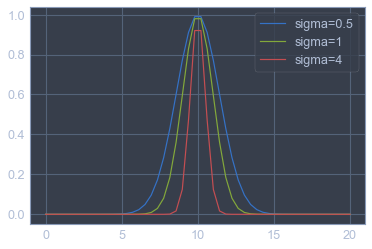

In [16]:
gaussianx = np.linspace(0,20)
mu1, sigma1 = 10, 0.5
gaussiany1 = np.exp(-(gaussianx - mu1) ** 2 / 2 * sigma1)
mu2, sigma2 = 10, 1
gaussiany2 = np.exp(-(gaussianx - mu2) ** 2 / 2 * sigma2)
mu3, sigma3 = 10, 4
gaussiany3 = np.exp(-(gaussianx - mu3) ** 2 / 2 * sigma3)
plt.plot(gaussianx, gaussiany1, label="sigma=0.5")
plt.plot(gaussianx, gaussiany2, label="sigma=1")
plt.plot(gaussianx, gaussiany3, label="sigma=4")
plt.legend(loc="best")

In [44]:
# Assumption: every point has the same "gaussian influence" across a single month
# Here we define a monthly importance(decay) factor and the sigma hyperparameter
sigma = 1
nm = 12
m = np.zeros(shape=(1,nm))
for i in range(nm):
    m[0,i] = i

In [59]:
XtrainEngineered  = np.zeros(shape=(len(Xtrain),nm))
Identity = np.ones(shape=(1,nm))
for i in range(len(Xtrain)):
    XtrainEngineered[i,:] = np.exp(-(Xtrain["Energy"][i] * Identity - m) ** 2 / (2 * sigma))

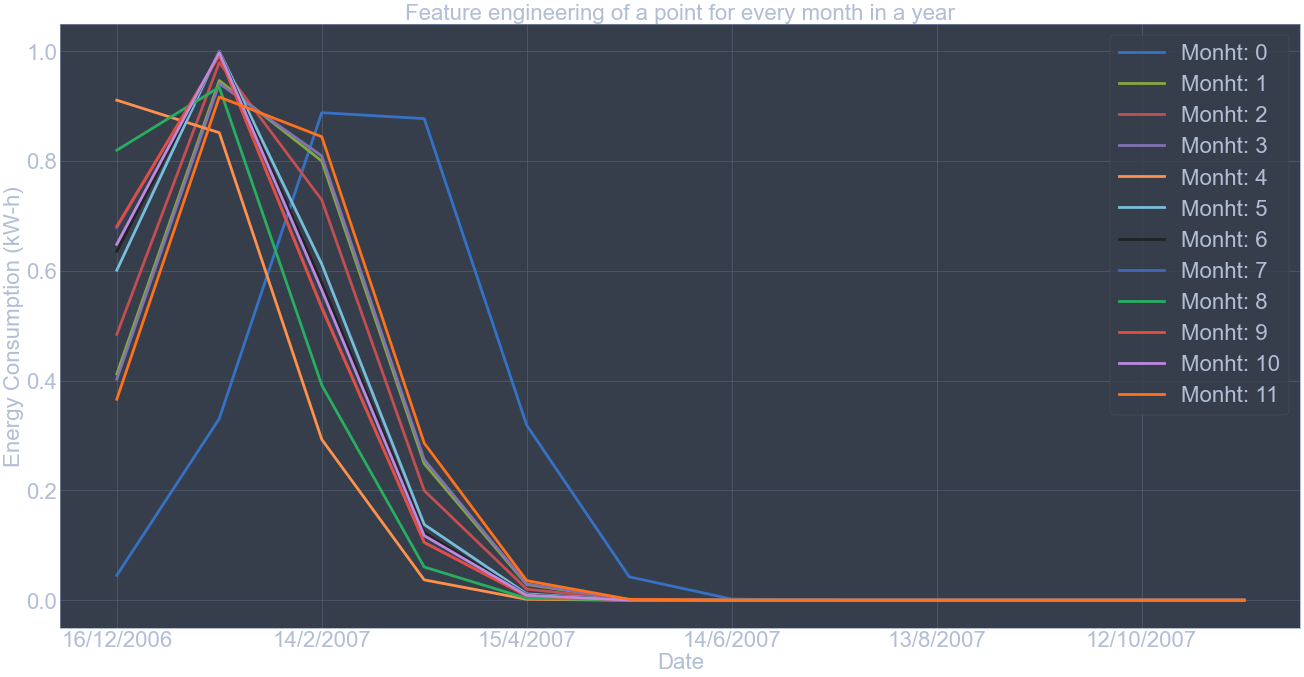

In [121]:
xtemp = []
ytemp = []
for i in range(0,335,30):
    xtemp.append(Xtrain["Time"][i])
    ytemp.append(XtrainEngineered[i,:])
    
# We create the plot here to visualize the feature engineering effect
plt.figure(figsize=(40,20), dpi=40)
plt.locator_params(axis='x', nbins=3)
x_ticks = np.arange(0, 11, 2)
plt.xticks(x_ticks)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
#plt.plot(data["Time"], data["Energy"], label='Original', linewidth='5')
plt.xlabel("Date", fontsize=40)
plt.ylabel("Energy Consumption (kW-h)", fontsize=40)
plt.title("Feature engineering of a point for every month in a year", fontsize=40)
#plt.legend(loc='best', fontsize=40)
for i in range(len(xtemp)):
    month = "Monht: " + str(i)
    plt.plot(xtemp, ytemp[i], linewidth='5', label=month)
plt.legend(loc='best', fontsize=40)
plt.show()